In [1]:
import netCDF4 as nc
import numpy as np
from CoreBx_funcs import *
import matplotlib.pyplot as plt

#### Check the conversion routine from lat/lon to UTM using a known benchmark

In [2]:
# Coordinates of test point CHL2 (benchmark near the Cape Hatteras light)
# NAD 83(2011) POSITION- 35 15 06.46121(N) 075 31 34.42905(W)   ADJUSTED 
# UTM  18      - 3,901,093.616   452,127.951   MT  0.99962824   -0 18 13.4

lat = 35.+15./60.+6.46121/3600.
lon = -(75.+31/60.+34.42905/3600.)
print(lat,lon)

# I think this function uses pyproj 2 - it should be updated
x,y = LatLon2UTM(lat,lon)
print(x,y)

35.25179478055556 -75.52623029166666
452127.9512561703 3901093.6160874437


C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


#### Import Christie's grid

In [3]:
fn = 'C:/crs/docs/talks/2021-05-28_COFDL_Dorian_Christie/NCoreBanks_sub6.nc'
ds = nc.Dataset(fn)
print(ds)

# extract the rho-point grids as arrays
lat = ds['lat_rho'][:]
lon = ds['lon_rho'][:]
h = ds['h'][:]
print('Shape of h and lon: ',np.shape(h),np.shape(lon))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    type: ROMS GRID file
    gridid: theGridTitle
    history: Created by create_roms_netcdf_grid_file, on 16-Nov-2020 11:42:58
    title: ROMS Application
    dimensions(sizes): xi_psi(399), xi_rho(400), xi_u(399), xi_v(400), eta_psi(499), eta_rho(500), eta_u(500), eta_v(499), one(1), two(2), bath(1)
    variables(dimensions): float64 xl(one), float64 el(one), |S1 JPRJ(two), |S1 spherical(one), int16 depthmin(one), int16 depthmax(one), float64 hraw(bath,eta_rho,xi_rho), float64 h(eta_rho,xi_rho), float64 f(eta_rho,xi_rho), float64 pm(eta_rho,xi_rho), float64 pn(eta_rho,xi_rho), float64 dndx(eta_rho,xi_rho), float64 dmde(eta_rho,xi_rho), float64 x_rho(eta_rho,xi_rho), float64 y_rho(eta_rho,xi_rho), float64 x_psi(eta_psi,xi_psi), float64 y_psi(eta_psi,xi_psi), float64 x_u(eta_,xi_), float64 y_u(eta_,xi_), float64 x_v(eta_v,xi_v), float64 y_v(eta_v,xi_v), float64 lat_rho(eta_rho,xi_rho), floa

#### Convert mesh lat/lon to UTM and then to island coordinates

In [ ]:
x,y = LatLon2UTM(lat,lon)
xisl,yisl=UTM2Island(x,y)

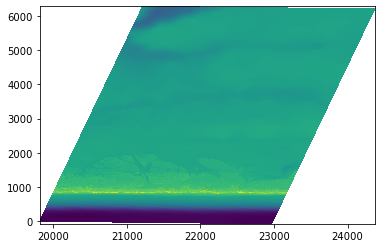

In [12]:
plt.pcolormesh(xisl,yisl,-h)
plt.z

#### Find dune crest (assume this is the max)

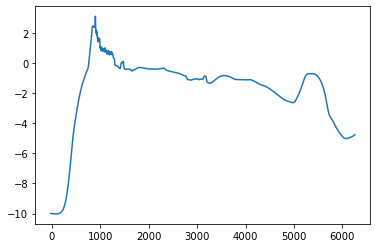

In [11]:
plt.plot(yisl[:,130],-h[:,30])

(400,)
75.0


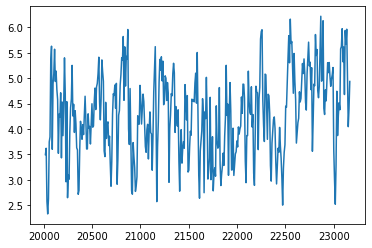

In [21]:
hmax = np.amax(-h,axis=0)
ihmax = np.argmax(-h,axis=0)
print(np.shape(hmax))
print(np.median(ihmax))
plt.plot(xisl[75,:],hmax)